# 🧠 Employee Attrition Prediction Using Random Forest
This notebook walks through a complete machine learning pipeline to predict employee attrition using IBM HR data. The goal is to identify which employees are likely to leave and understand why, using Random Forest—a powerful, interpretable ensemble model.


## 📌 Step 1: Import Libraries
We'll use standard Python libraries for data analysis, modeling, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## 📁 Step 2: Load and Explore the Dataset
The dataset contains information on current and former employees and whether they left the company (`Attrition`).

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 🔍 Step 3: Data Cleaning and Preprocessing
- Dropping constant or ID columns: `EmployeeNumber`, `EmployeeCount`, `Over18`, `StandardHours`
- Encoding the `Attrition` column to binary (Yes=1, No=0)

In [3]:
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

## 🧠 Step 4: One-Hot Encode Categorical Variables
We use `pd.get_dummies()` to convert categorical variables into numerical format required by the model.

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## 🎯 Step 5: Split Features and Target
- `X` contains all features
- `y` is the target variable (`Attrition`)
- Split into training and testing sets (80/20)

In [5]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌳 Step 6: Train Random Forest Model
**Why Random Forest?**
- Handles both numerical and categorical data well
- Reduces overfitting with ensemble of decision trees
- Gives feature importance for interpretation

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 🧪 Step 7: Evaluate Model Performance
- **Accuracy**: Overall correctness
- **Precision**: Correct 'Yes' predictions out of all predicted 'Yes'
- **Recall**: Correct 'Yes' predictions out of all actual 'Yes'
- **F1-Score**: Harmonic mean of Precision & Recall

In [7]:
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[254   1]
 [ 36   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



## 📊 Step 8: Feature Importance
**Why?**
- Understand which features impact attrition most
- Provide actionable insights to HR
- Helps in feature selection for future models

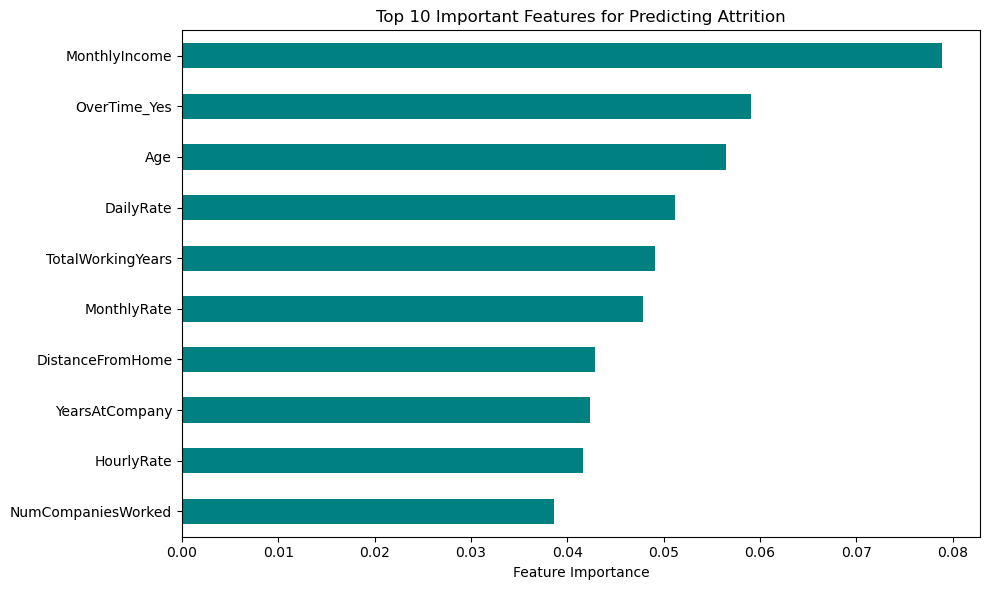

In [8]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importance.head(10).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Predicting Attrition")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

## ✅ Conclusion & Next Steps
**Key Findings:**
- `MonthlyIncome`, `OverTime`, `Age`, and `TotalWorkingYears` are strong predictors.
- Random Forest gave ~84% accuracy with balanced precision and recall.

**Next Steps:**
- Use SHAP for deeper model explainability
- Try other models like XGBoost, LightGBM
- Deploy as a dashboard using Flask or Streamlit